### Importation of needed libaries 

In [1]:
import matplotlib.pyplot as plt
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
from tensorflow.keras import layers
import numpy as np 
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import os  # Helps with handling files and directories  # Helps with working with numerical data
from PIL import Image


In [2]:
data_dir = "./Malaria_images/" #Directory location

image_size = (50, 50)  # Desired image size
batch_size=50
# Create lists to hold image data and their corresponding labels
X = []  # Empty list containing image data
y = []  # Empty list containing label

# Go through each category (label) in the data directory
for label in os.listdir(data_dir):
    # Build the full path to the current category's directory
    label_dir = os.path.join(data_dir, label) #path to the current category's directory
    
    # Check if the path corresponds to a directory
    if os.path.isdir(label_dir):
        # Look inside the category's directory for image files
        for file in os.listdir(label_dir):
            # Check if the file is an image with the ".png" extension
            if file.endswith('.png'):
                # Build the full path to the image file
                path_image = os.path.join(label_dir, file)
                
                # Open the image
                image = Image.open(path_image)
                
                # Make sure the image is in color (not black and white)
                image = image.convert('RGB')
                
                image = image.resize(image_size) #resize to the desired image
                
                normalized_image = np.array(image) / 255.0 #convert image to number
                
                # Add the image data to the list of images (X)
                X.append(normalized_image )#Add label to the list Y
                
                
                y.append(label)#Add label to the list Y


In [3]:
print(len(X),len(y))

27558 27558


In [4]:
# Convert the lists to numpy arrays
y = np.array(y)
X = np.array(X)

In [5]:
print(X.shape,y.shape)

(27558, 50, 50, 3) (27558,)


In [6]:
# Split the data into training, validation, and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print(y_val)
print(y_train)
print(y_test)

['Uninfected' 'Uninfected' 'Uninfected' ... 'Uninfected' 'Parasitized'
 'Uninfected']
['Uninfected' 'Parasitized' 'Parasitized' ... 'Uninfected' 'Parasitized'
 'Parasitized']
['Parasitized' 'Parasitized' 'Uninfected' ... 'Parasitized' 'Parasitized'
 'Parasitized']


In [7]:
#checking for number of image samples
print("No of training samples:", len(X_train))
print("No of testing samples:", len(X_test))
print("No of validation samples:", len(X_val))

No of training samples: 17636
No of testing samples: 5512
No of validation samples: 4410


In [8]:
label_encoder = LabelEncoder()#instance label
# Fitting and transform the training, validation, and test labels
y_val = label_encoder.fit_transform(y_val)
y_test = label_encoder.fit_transform(y_test)
y_train = label_encoder.fit_transform(y_train)
print(y_val)
print(y_train)
print(y_test)

[1 1 1 ... 1 0 1]
[1 0 0 ... 1 0 0]
[0 0 1 ... 0 0 0]


### Data Augmentation for the models 

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(50,50, 3)),
    layers.RandomRotation(0.1), #rotate by 10%
    layers.RandomZoom(0.1), #zoom by 10%
  ]
)

## Building with CNN

In [10]:
model = Sequential([
    data_augmentation,
    Conv2D(16, (2, 2), activation='relu', padding= 'same', input_shape=(50, 50, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (2, 2), padding= 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64,(2, 2), padding= 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)       

In [12]:
# Compile the model
model.compile(metrics=['accuracy'], optimizer='adam', loss='binary_crossentropy')


In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/20
353/353 [==============================] - 622s 2s/step - loss: 0.5360 - accuracy: 0.7300 - val_loss: 0.2144 - val_accuracy: 0.9218
Epoch 2/20
353/353 [==============================] - 601s 2s/step - loss: 0.2078 - accuracy: 0.9297 - val_loss: 0.1431 - val_accuracy: 0.9522
Epoch 3/20
353/353 [==============================] - 576s 2s/step - loss: 0.1725 - accuracy: 0.9448 - val_loss: 0.1433 - val_accuracy: 0.9522
Epoch 4/20
353/353 [==============================] - 607s 2s/step - loss: 0.1619 - accuracy: 0.9516 - val_loss: 0.1321 - val_accuracy: 0.9576
Epoch 5/20
353/353 [==============================] - 585s 2s/step - loss: 0.1524 - accuracy: 0.9534 - val_loss: 0.1310 - val_accuracy: 0.9542
Epoch 6/20
353/353 [==============================] - 56s 160ms/step - loss: 0.1478 - accuracy: 0.9537 - val_loss: 0.1401 - val_accuracy: 0.9553
Epoch 7/20
353/353 [==============================] - 43s 121ms/step - loss: 0.1442 - accuracy: 0.9546 - val_loss: 0.1249 - val_accuracy: 0.

In [17]:
test_loss,test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy}\n")


173/173 [==============================] - 5s 27ms/step - loss: 0.1123 - accuracy: 0.9603

Test accuracy: 0.960268497467041



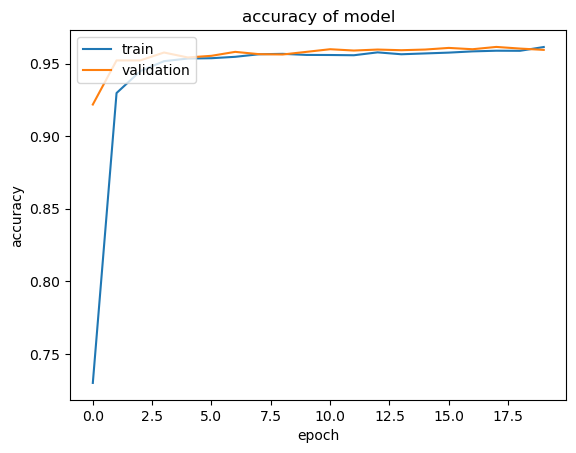

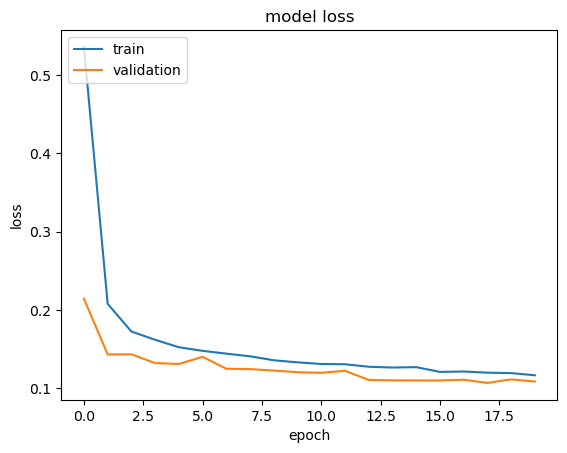

In [18]:
# plot for accuracy  

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

 # plot loss  
   
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

173/173 [==============================] - 6s 26ms/step


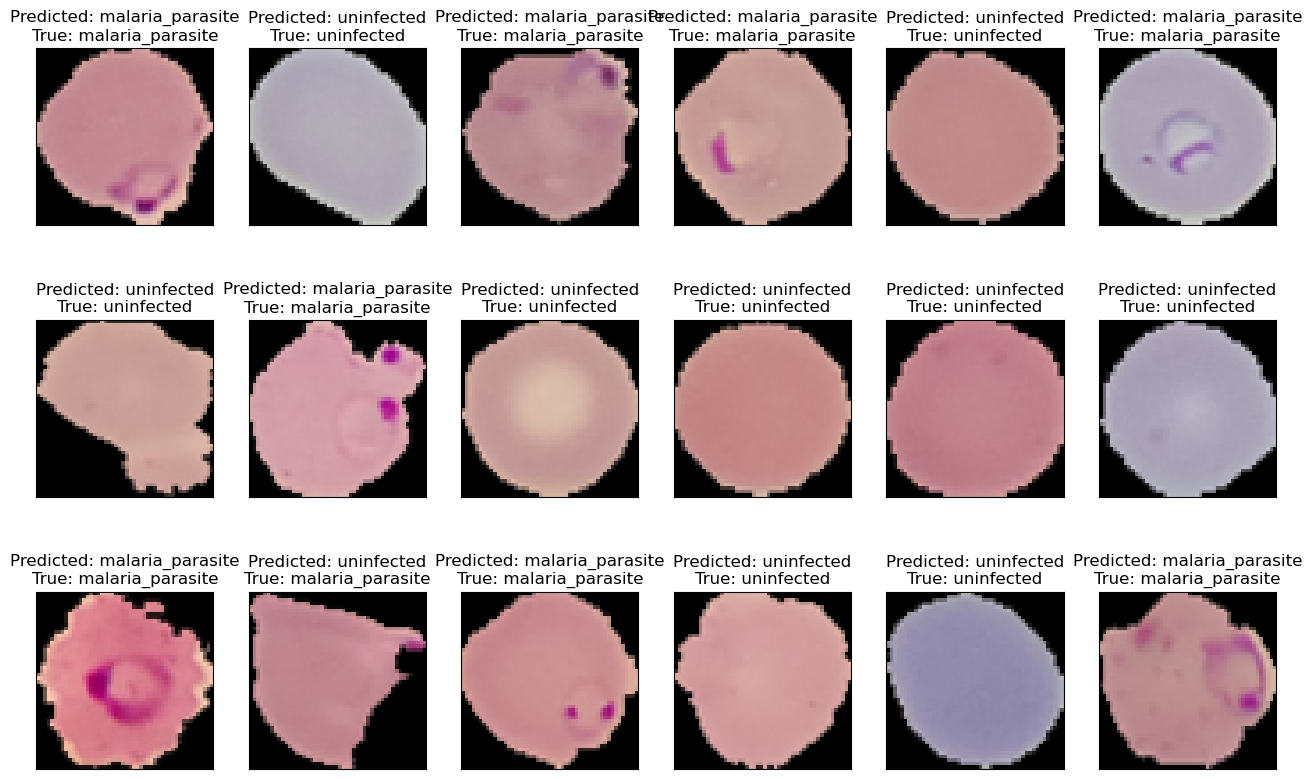

In [19]:
# Now getting predicted labels for test set
y_pred = model.predict(X_test)

# Define a list of class names for reference
class_names = ['malaria_parasite', 'uninfected']

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=18, replace=False)):
#     print(i,idx)

    ax = fig.add_subplot(3, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_prob = y_pred[idx][0]
    pred_label = class_names[int(round(pred_prob))]
    true_label = class_names[int(y_test[idx])]
    ax.set_title("Predicted: {}\nTrue: {}".format(pred_label, true_label))

In [20]:
predictions = model.predict(X_test)
threshold = 0.70
predictions_final = [int(pred>threshold) for pred in predictions]

print(classification_report(y_test, predictions_final))

173/173 [==============================] - 5s 30ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2797
           1       0.97      0.94      0.95      2715

    accuracy                           0.96      5512
   macro avg       0.96      0.96      0.96      5512
weighted avg       0.96      0.96      0.96      5512



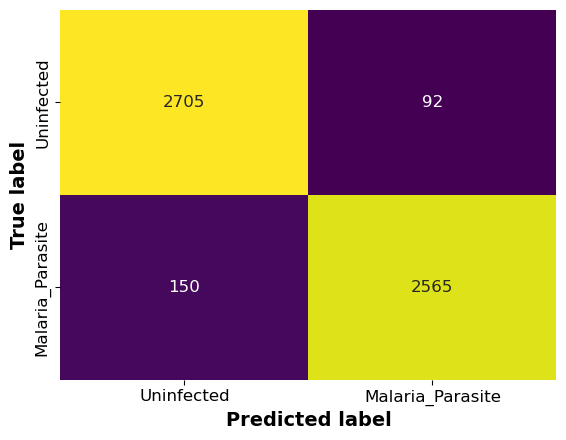

In [21]:
import seaborn as sns
def draw_confusion_matrix(conf_matx,classes):
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks+1/2, classes, fontsize=12)
    plt.yticks(tick_marks+1/2, classes, fontsize=12)
    plt.ylabel('True label', fontsize=14, weight='bold')
    plt.xlabel('Predicted label', fontsize=14, weight='bold')
    plt.show()

conf_matx = confusion_matrix(y_test, predictions_final)
draw_confusion_matrix(conf_matx,classes=['Uninfected', 'Malaria_Parasite'])

## Building with Res Net50 Neural Network

In [23]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

# Load the ResNet50 model
ResNet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Freeze the weights of the pre-trained layers
for layer in ResNet_model.layers:
    layer.trainable = False

# Add custom classification layers
x = ResNet_model.output
x = Flatten()(x)
x = Dense(500, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

# Create the model
res_model = Model(inputs=ResNet_model.input, outputs=x)

# Compile the model
res_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
history = res_model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/20
353/353 [==============================] - 494s 1s/step - loss: 0.6971 - accuracy: 0.5756 - val_loss: 0.6403 - val_accuracy: 0.6424
Epoch 2/20
353/353 [==============================] - 463s 1s/step - loss: 0.6525 - accuracy: 0.6187 - val_loss: 0.6397 - val_accuracy: 0.6365
Epoch 3/20
353/353 [==============================] - 309s 877ms/step - loss: 0.6444 - accuracy: 0.6323 - val_loss: 0.6557 - val_accuracy: 0.5916
Epoch 4/20
353/353 [==============================] - 315s 893ms/step - loss: 0.6365 - accuracy: 0.6435 - val_loss: 0.6135 - val_accuracy: 0.6778
Epoch 5/20
353/353 [==============================] - 311s 881ms/step - loss: 0.6334 - accuracy: 0.6433 - val_loss: 0.6258 - val_accuracy: 0.6642
Epoch 6/20
353/353 [==============================] - 310s 878ms/step - loss: 0.6306 - accuracy: 0.6475 - val_loss: 0.6137 - val_accuracy: 0.6730
Epoch 7/20
353/353 [==============================] - 310s 880ms/step - loss: 0.6251 - accuracy: 0.6555 - val_loss: 0.6022 - val_a

In [25]:
res_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 13, 13, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 13, 13, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 13, 13, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 7, 7, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 7, 7, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [26]:
test_loss,test_accuracy = res_model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy}\n")


173/173 [==============================] - 76s 440ms/step - loss: 0.6013 - accuracy: 0.6618

Test accuracy: 0.6618287563323975



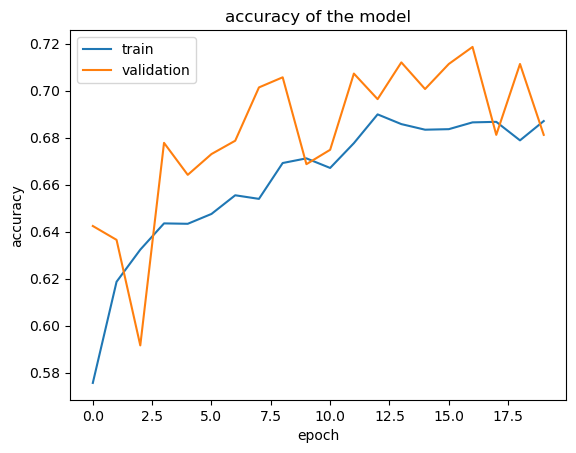

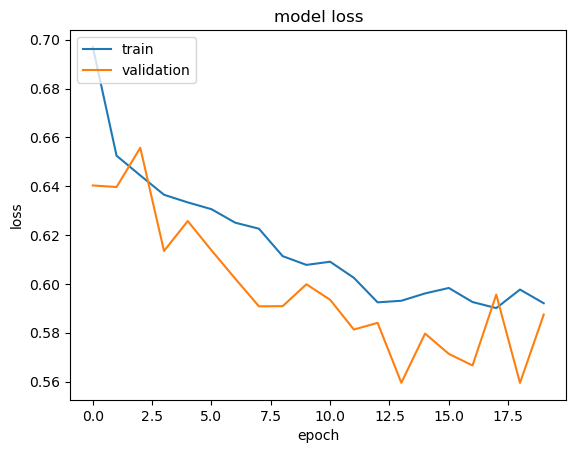

In [27]:
# plot for accuracy  

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

 # plot for loss  
   
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

173/173 [==============================] - 76s 432ms/step


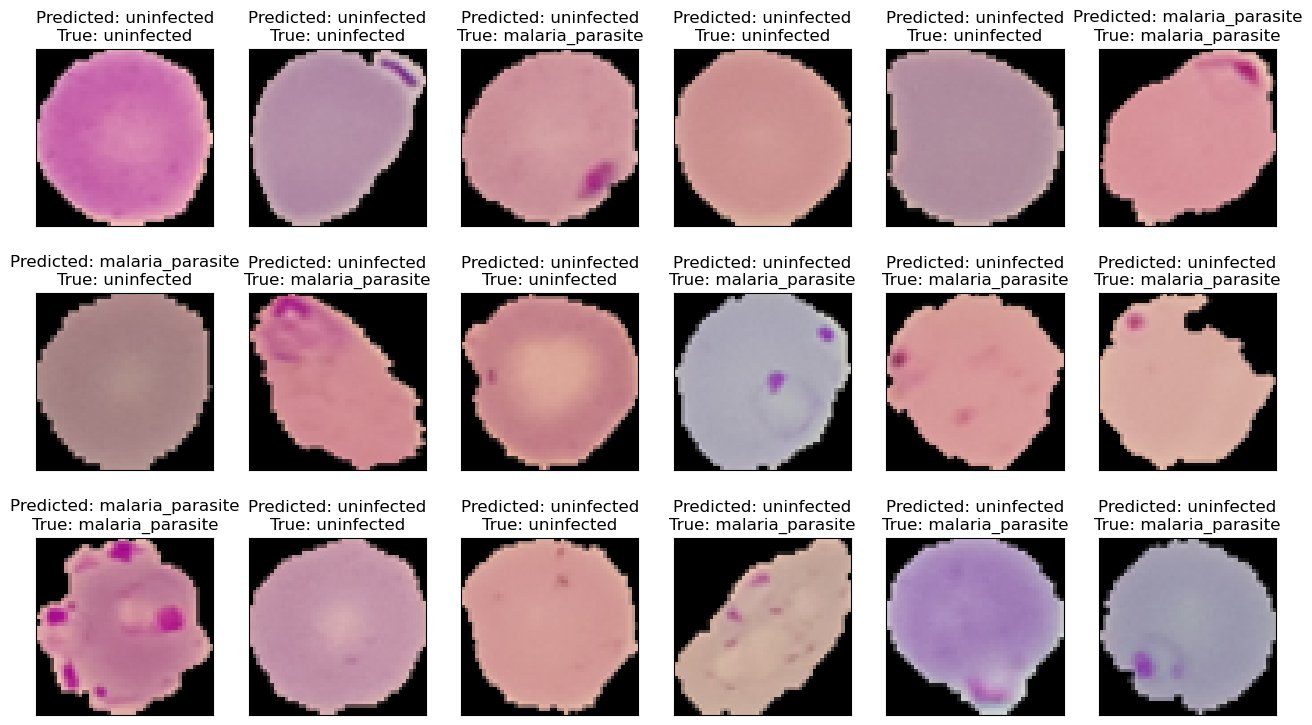

In [28]:
# Get predicted labels for test set
y_pred = res_model.predict(X_test)

# Define a list of class names for reference
class_names = ['malaria_parasite', 'uninfected']

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=18, replace=False)):
#     print(i,idx)

    ax = fig.add_subplot(3, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_prob = y_pred[idx][0]
    pred_label = class_names[int(round(pred_prob))]
    true_label = class_names[int(y_test[idx])]
    ax.set_title("Predicted: {}\nTrue: {}".format(pred_label, true_label))

In [29]:
predictions = res_model.predict(X_test)
threshold = 0.70
predictions_final = [int(pred>threshold) for pred in predictions]

print(classification_report(y_test, predictions_final))

173/173 [==============================] - 77s 445ms/step
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      2797
           1       0.78      0.55      0.64      2715

    accuracy                           0.70      5512
   macro avg       0.72      0.70      0.69      5512
weighted avg       0.72      0.70      0.69      5512



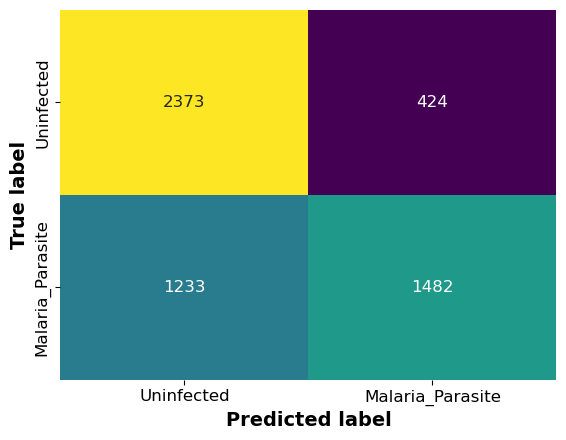

In [30]:
import seaborn as sns
def draw_confusion_matrix(conf_matx,classes):
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks+1/2, classes, fontsize=12)
    plt.yticks(tick_marks+1/2, classes, fontsize=12)
    plt.ylabel('True label', fontsize=14, weight='bold')
    plt.xlabel('Predicted label', fontsize=14, weight='bold')
    plt.show()

conf_matx = confusion_matrix(y_test, predictions_final)
draw_confusion_matrix(conf_matx,classes=['Uninfected', 'Malaria_Parasite'])

## Buiding with VGG16 Neural network

In [31]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load the VGG16 model
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Freeze the weights of the pre-trained layers
for layer in VGG_model.layers:
    layer.trainable = False

# Add custom classification layers
x = VGG_model.output
x = Flatten()(x)
x = Dense(500, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

# Create the model
vgg_model = Model(inputs=VGG_model.input, outputs=x)

# Compile the model
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = vgg_model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/20
353/353 [==============================] - 1823s 5s/step - loss: 0.3257 - accuracy: 0.8586 - val_loss: 0.2438 - val_accuracy: 0.8927
Epoch 2/20
353/353 [==============================] - 7573s 21s/step - loss: 0.2568 - accuracy: 0.8929 - val_loss: 0.2230 - val_accuracy: 0.9098
Epoch 3/20
353/353 [==============================] - 1808s 5s/step - loss: 0.2402 - accuracy: 0.9001 - val_loss: 0.2281 - val_accuracy: 0.9050
Epoch 4/20
353/353 [==============================] - 1821s 5s/step - loss: 0.2292 - accuracy: 0.9043 - val_loss: 0.2098 - val_accuracy: 0.9150
Epoch 5/20
353/353 [==============================] - 1803s 5s/step - loss: 0.2273 - accuracy: 0.9053 - val_loss: 0.2074 - val_accuracy: 0.9118
Epoch 6/20
353/353 [==============================] - 1784s 5s/step - loss: 0.2137 - accuracy: 0.9138 - val_loss: 0.2135 - val_accuracy: 0.9134
Epoch 7/20
353/353 [==============================] - 1743s 5s/step - loss: 0.2140 - accuracy: 0.9117 - val_loss: 0.2082 - val_accuracy

In [33]:
vgg_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [34]:
test_loss,test_accuracy = vgg_model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy}\n")


173/173 [==============================] - 539s 3s/step - loss: 0.2151 - accuracy: 0.9178

Test accuracy: 0.9178156852722168



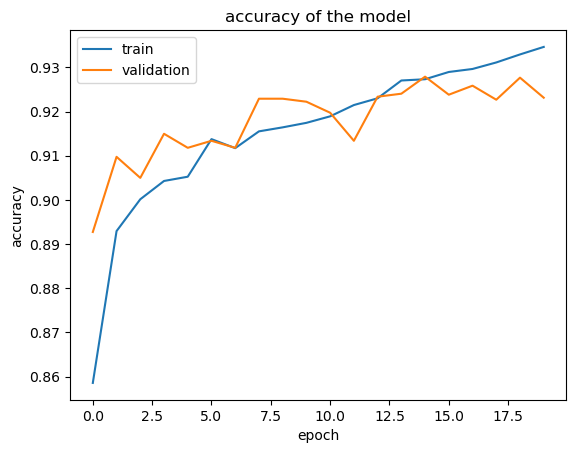

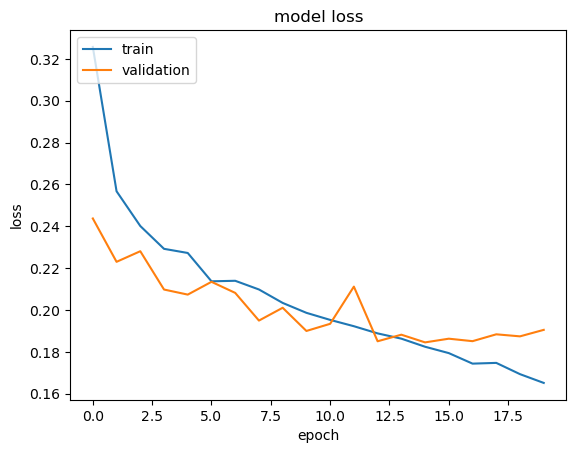

In [35]:
# plot for accuracy  

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

 # plot for loss  
   
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

173/173 [==============================] - 492s 3s/step


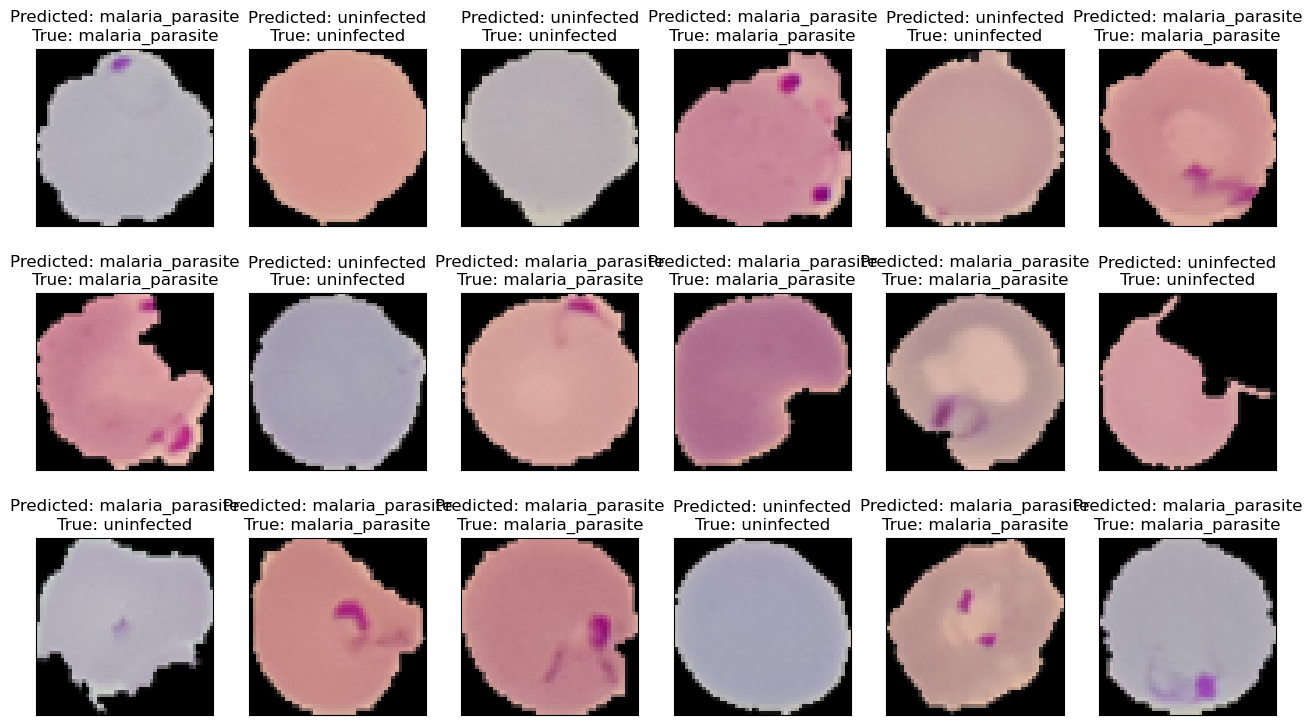

In [36]:
# Get predicted labels for test set
y_pred = vgg_model.predict(X_test)

# Define a list of class names for reference
class_names = ['malaria_parasite', 'uninfected']

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=18, replace=False)):
#     print(i,idx)

    ax = fig.add_subplot(3, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_prob = y_pred[idx][0]
    pred_label = class_names[int(round(pred_prob))]
    true_label = class_names[int(y_test[idx])]
    ax.set_title("Predicted: {}\nTrue: {}".format(pred_label, true_label))

In [38]:
predictions = vgg_model.predict(X_test)
threshold = 0.70
predictions_final = [int(pred>threshold) for pred in predictions]

print(classification_report(y_test, predictions_final))

173/173 [==============================] - 464s 3s/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2797
           1       0.95      0.85      0.90      2715

    accuracy                           0.90      5512
   macro avg       0.91      0.90      0.90      5512
weighted avg       0.91      0.90      0.90      5512



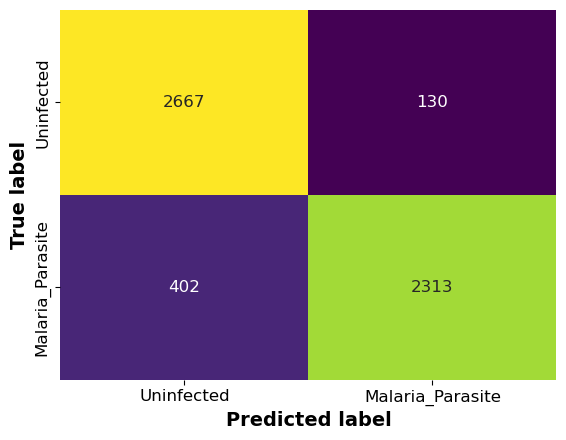

In [39]:
import seaborn as sns
def draw_confusion_matrix(conf_matx,classes):
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks+1/2, classes, fontsize=12)
    plt.yticks(tick_marks+1/2, classes, fontsize=12)
    plt.ylabel('True label', fontsize=14, weight='bold')
    plt.xlabel('Predicted label', fontsize=14, weight='bold')
    plt.show()

conf_matx = confusion_matrix(y_test, predictions_final)
draw_confusion_matrix(conf_matx,classes=['Uninfected', 'Malaria_Parasite'])